CS512 - Computer Vision - Assignment 2

Submitted by-

Tushar Gwal A20449419

# Question 1: Add Gaussian Noise and Compute SNR

Noise Power: 359.43265
Signal Power: 972.4205
SNR: 4.322365820407867


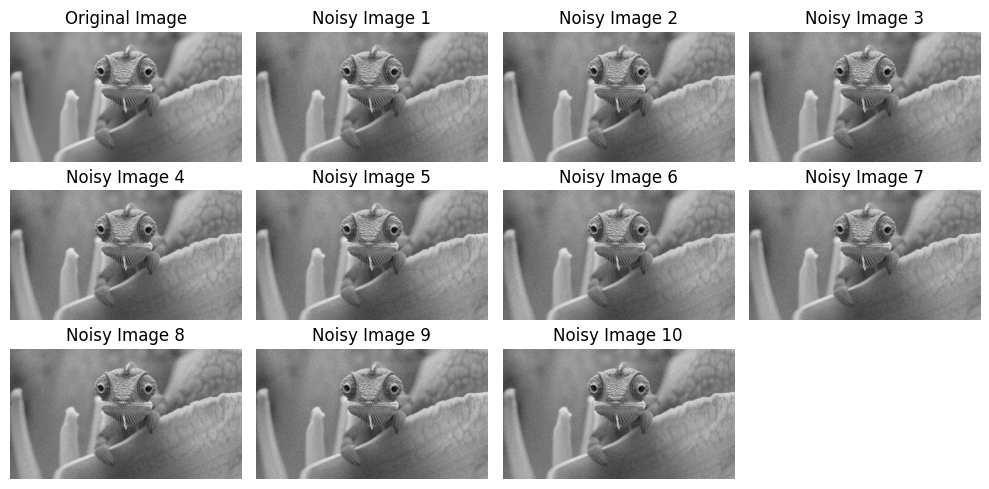

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
image = cv2.imread('/content/MainAfter.webp', cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32)  # Convert to float for precise calculations

# Parameters for Gaussian noise
std_dev = 20  # Known standard deviation for Gaussian noise
mean = 0  # Mean of the Gaussian noise
num_noisy_images = 10  # Number of noisy images to generate

# Generate 10 noisy versions of the grayscale image
noisy_images = []
for i in range(num_noisy_images):
    noise = np.random.normal(mean, std_dev, image.shape).astype(np.float32)
    noisy_image = np.clip(image + noise, 0, 255)  # Clip values to be in valid range
    noisy_images.append(noisy_image)

# Compute the noise power as the mean of the noise variance
std = np.std(noisy_images, axis=0)     #standard deviation (pixel wise)
nv = std**2    #noise variance (pixel wise)
npower = np.mean(nv)

# Compute the signal power as the variance of the original image
sp = np.var(image)

# Compute SNR in decibels (dB)
snr = 10 * np.log10(sp / npower)

# Display Results
print('Noise Power:', npower)
print('Signal Power:', sp)
print('SNR:', snr)

plt.figure(figsize=(10, 5))

# Original image
plt.subplot(3, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Noisy images
for i, noisy_image in enumerate(noisy_images):
    plt.subplot(3, 4, i+2)
    plt.imshow(noisy_image, cmap='gray')
    plt.title(f'Noisy Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


# Question 2. Implement a Convolution Filter for Smoothing

Manual convolution time: 7.50472 seconds
OpenCV convolution time (zero padding): 0.00146 seconds


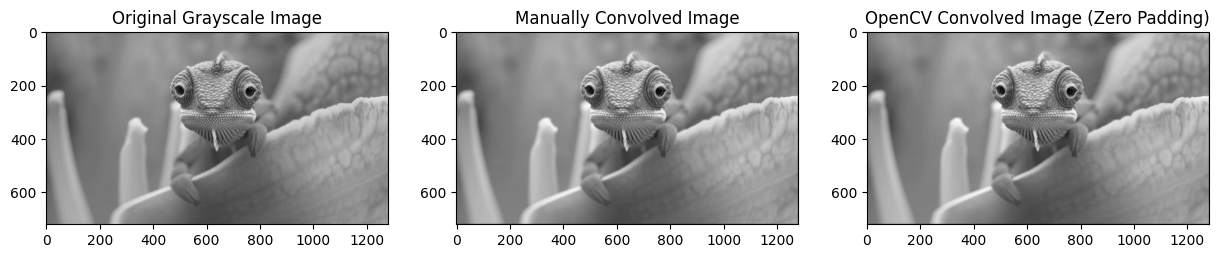

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time


def manual_convolution(image, kernel):
     ih, iw = image.shape      #ih is image height, iw is image width
     kh, kw = kernel.shape     #kh is kernel height, kw is kernel widt
     ph = kh // 2     #ph is pad height
     pw = kw // 2     #pw is pad width
     pad = np.pad(image, ((ph, ph), (pw, pw)), mode='constant', constant_values=0)   #Zero padding
     output_image = np.zeros((ih, iw))
     for i in range(ih):          #convolution_loop
        for j in range(iw):
            roi = pad[i:i+kh, j:j+kw]
            output_image[i, j] = np.sum(roi * kernel)
     return output_image

# Load the image and convert it to grayscale
image = cv2.imread('/content/MainAfter.webp', cv2.IMREAD_GRAYSCALE)

# Define a 3x3 averaging filter (kernel)
kernel = np.ones((3, 3)) / 9.0

# Time the manual convolution implementation
start_manual = time.time()
smoothed_image_manual = manual_convolution(image, kernel)
end_manual = time.time()
start_opencv = time.time()
smoothed_image_opencv = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_CONSTANT)
end_opencv = time.time()
print(f"Manual convolution time: {end_manual - start_manual:.5f} seconds")
print(f"OpenCV convolution time (zero padding): {end_opencv - start_opencv:.5f} seconds")

# Display the original, manually convolved, and OpenCV-convolved images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.subplot(1, 3, 2)
plt.imshow(smoothed_image_manual, cmap='gray')
plt.title('Manually Convolved Image')
plt.subplot(1, 3, 3)
plt.imshow(smoothed_image_opencv, cmap='gray')
plt.title('OpenCV Convolved Image (Zero Padding)')
plt.show()


Performance Difference:


*   Manual convolution is relatively slow as this method iterates (loops) through each pixel and performs convolution by extracting regions and multiplying them by the kernel.


* Whereas, OpenCV's Convolution
takes advantage of parallelization and other optimizations, making it much faster than the manual implementation.





# Question 3. Convolution with Stride

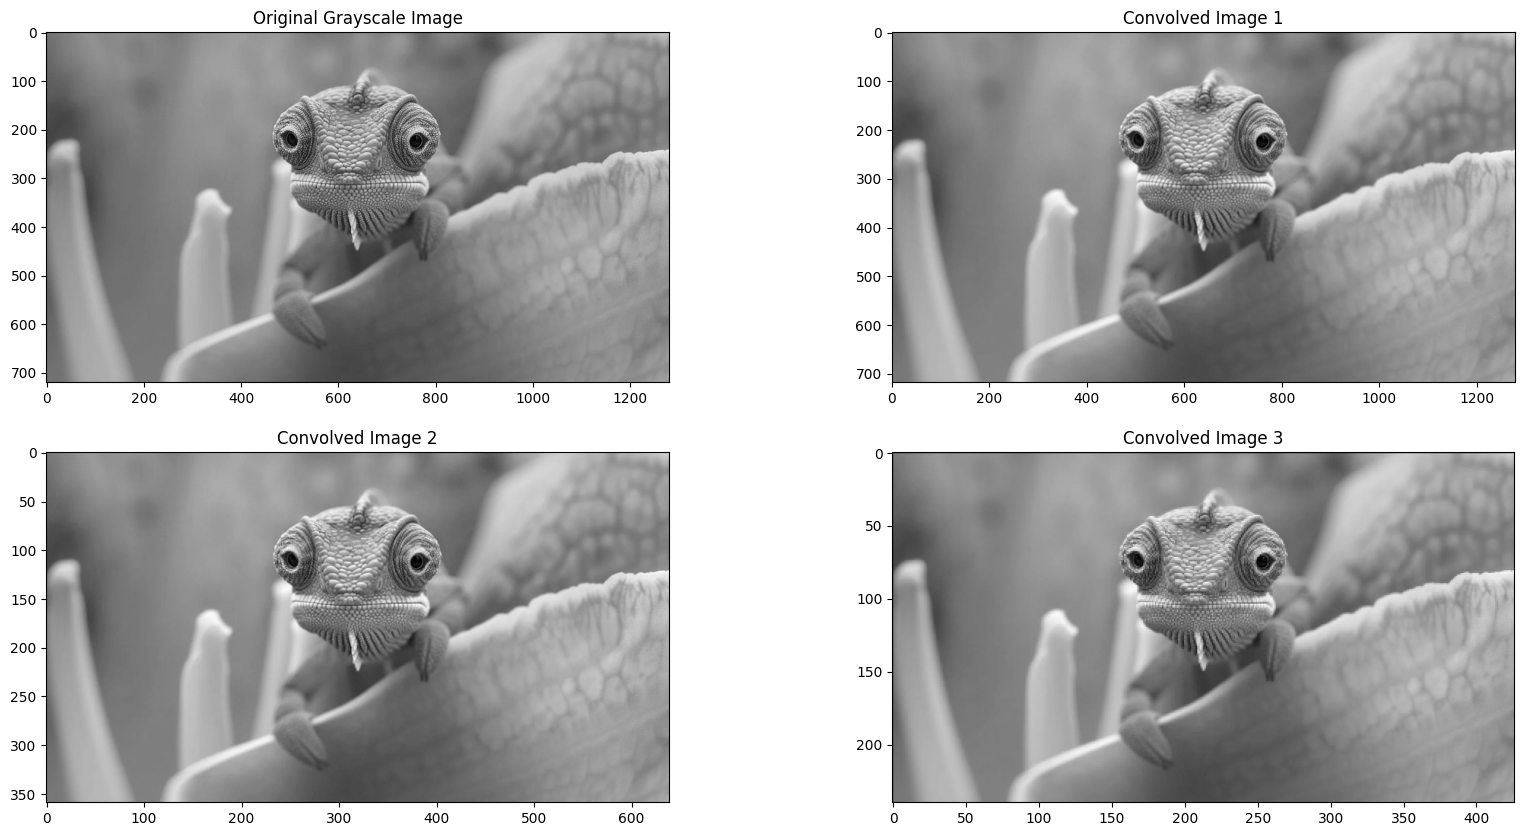

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Function for convolution with stride and zero padding
def convolution_with_stride(image, kernel, stride=2):
    ih, iw = image.shape      #ih is image height, iw is image width
    kh, kw = kernel.shape     #kh is kernel height, kw is kernel widt
    ph = kh // 2     #ph is pad height
    pw = kw // 2     #pw is pad width
    pad = np.pad(image, ((ph, ph), (pw, pw)), mode='constant', constant_values=0)   #Zero padding
    oh = (ih - kh) // stride + 1  #output height
    ow = (iw - kw) // stride + 1    #output width
    output_image = np.zeros((oh, ow))
    for i in range(0, ih - kh + 1, stride):             #convolution loop
        for j in range(0, iw - kw + 1, stride):
            roi = pad[i:i+kh, j:j+kw]
            output_image[i//stride, j//stride] = np.sum(roi * kernel)
    return output_image

# Load the image and convert it to grayscale
image = cv2. imread ('/content/MainAfter.webp', cv2.IMREAD_GRAYSCALE)

# Define a 3x3 averaging filter (kernel) as an argument
kernel = np.ones ( (3, 3)) / 9.0

# Apply the convolution
smoothed_image_stride_1 = convolution_with_stride(image, kernel, stride=1)
smoothed_image_stride_2 = convolution_with_stride(image, kernel, stride=2)
smoothed_image_stride_3 = convolution_with_stride(image, kernel, stride=3)

# Display the original and convolved images
plt.figure(figsize=(20, 10))      #changed it because images were overlapping on each other
plt.subplot(2, 2, 1)
plt.imshow(image, cmap= 'gray')
plt.title("Original Grayscale Image")

for i, smoothed_image in enumerate([smoothed_image_stride_1, smoothed_image_stride_2, smoothed_image_stride_3]):
  plt.subplot(2, 2, i+2)
  plt.imshow(smoothed_image, cmap= 'gray')
  plt.title(f"Convolved Image {i+1}")

plt.show()

Observation:



*  If the stride is larger, the output image will be smaller because fewer positions of the kernel will be applied across the image.
*  A smaller stride means more overlap in the convolution and an output closer in size to the original image.





# Question 4. Compute and apply a Gaussian Smoothing Filter


Gaussian Kernel (5x5): 
 [[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


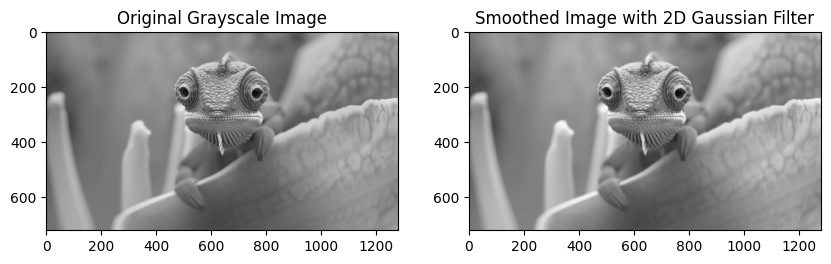

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a 2D Gaussian kernel
def gaussian_kernel(size, sigma):
    x = np.linspace(-size // 2 + 1, size // 2, size)
    y = np.linspace(-size // 2 + 1, size // 2, size)
    x, y = np.meshgrid(x, y)
    k = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = k / np.sum(k)
    return kernel

# Load the image and convert to grayscale
image = cv2. imread ('/content/MainAfter.webp', cv2. IMREAD_GRAYSCALE)

# Generate and display the 2D Gaussian kernel
kernel_size = 5 # 5x5 kernel
sigma = 1.0 # Standard deviation for the Gaussian
gaussian_kernel_2d = gaussian_kernel(kernel_size, sigma)
print ("Gaussian Kernel (5x5): \n", gaussian_kernel_2d)

# Apply the Gaussian filter to the image using OpenCV's filter2D
smoothed_image = cv2.filter2D(image, -1, gaussian_kernel_2d)

# Display the original and smoothed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title("Smoothed Image with 2D Gaussian Filter")
plt.show()

Reasoning:

* In general, the standard deviation should be less than or equal to half the filter size. therefore, for a 5x5 filter, upper limit for 𝜎 should be 2.0. If 𝜎 is too large, the Gaussian function spreads out too much, making the filter act more like an averaging filter, which might reduce its smoothing effect.

# Question 5. Gaussian Pyramid Construction


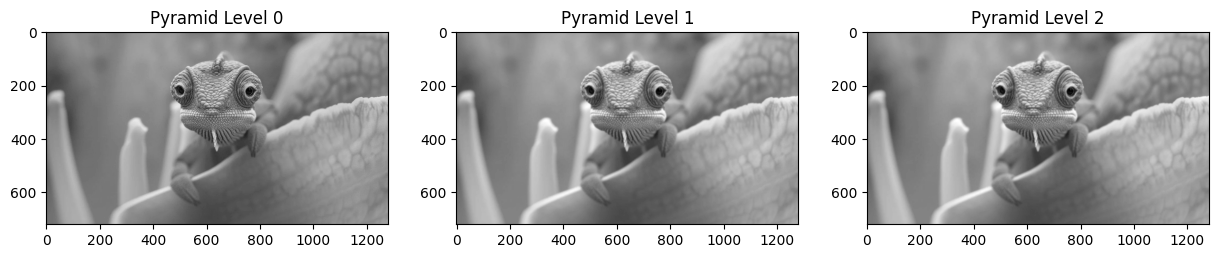

In [69]:
# Compute Gaussian pyramid
def gaussian_pyramid(image, levels=3):
    pyramid = [image]                #original image
    for i in range(0, levels-1):
        pyramid.append(cv2.pyrDown(image))
    return pyramid

# Load the image and convert to grayscale
image = cv2. imread ('/content/MainAfter.webp', cv2.IMREAD_GRAYSCALE)

# Display pyramid with resized layers
pyramid_layers = gaussian_pyramid(image)
resized_pyramid_layers = [cv2.resize(layer, (image. shape[1], image.shape[0])) for layer in pyramid_layers]

# Display results
plt.figure(figsize=(15, 5))
for i, layer in enumerate(resized_pyramid_layers):
    plt.subplot(1, len(resized_pyramid_layers), i + 1)
    plt.imshow(layer, cmap='gray')
    plt.title(f"Pyramid Level {i}")
plt.show()

Observation:
* We can see that each successive pyramid layer is a downsampled
version of the previous layer, with a reduced resolution.
*  The downsampled layers have a blurred appearance because Gaussian filtering is applied during the downsampling process.

# Question 6. Image Gradients and Histogram of Gradient Directions

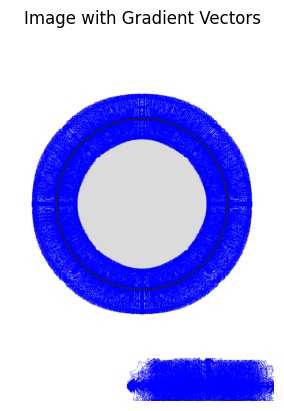

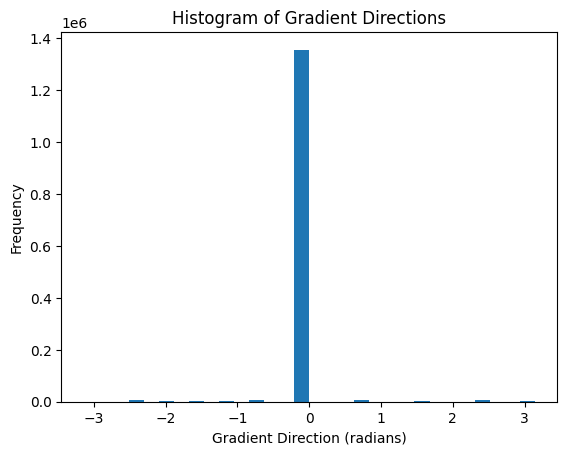

In [76]:
import cv2
import numpy as np

# Load the image
image = cv2. imread('/content/Circle-DRAWING-–-STEP-10.jpg', cv2.IMREAD_GRAYSCALE)

# Compute gradients
grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
magnitude = np.sqrt(grad_x**2 + grad_y**2)
direction = np.arctan2(grad_y, grad_x)

# Draw gradient vectors
image_with_vectors = cv2. cvtColor(image, cv2. COLOR_GRAY2BGR)
threshold = 100
strong_magnitudes = magnitude > threshold
y_coords, x_coords = np.where (strong_magnitudes)

# Draw gradient vectors (arrows) on the image
for y, x in zip (y_coords, x_coords) :
 dx = int (grad_x[y, x] / 10)
 dy = int (grad_y[y, x] / 10)
 start_point = (x, y)
 end_point = (x + dx, y + dy)
 cv2. arrowedLine(image_with_vectors, start_point, end_point, (0, 0, 255), 1, tipLength=0.3)

# Display the results
#cv2.imshow("Image with Gradient Vectors", image_with_vectors)
#plt.hist(direction.ravel(), bins=30)
#plt.title("Histogram of Gradient Directions")
#plt.show()

import matplotlib.pyplot as plt

# Display the results
plt.figure()  # Create a new figure for the image
plt.imshow(image_with_vectors)
plt.title("Image with Gradient Vectors")
plt.axis('off')  # Hide axis ticks

plt.figure()  # Create another figure for the histogram
plt.hist(direction.ravel(), bins=30)
plt.title("Histogram of Gradient Directions")
plt.xlabel("Gradient Direction (radians)")
plt.ylabel("Frequency")

plt.show()

Observation:


*   The gradient vectors show where the image changes, like around edges. By focusing on strong gradients, we can highlight the most important edges. The histogram of gradient directions shows the angles of these edges, helping us understand the main shapes in the image.
*   Simple shapes like squares or circles produce clear gradient directions which is why i have used here a simple circle image.

# Question 7. Gaussian Derivatives Gradients

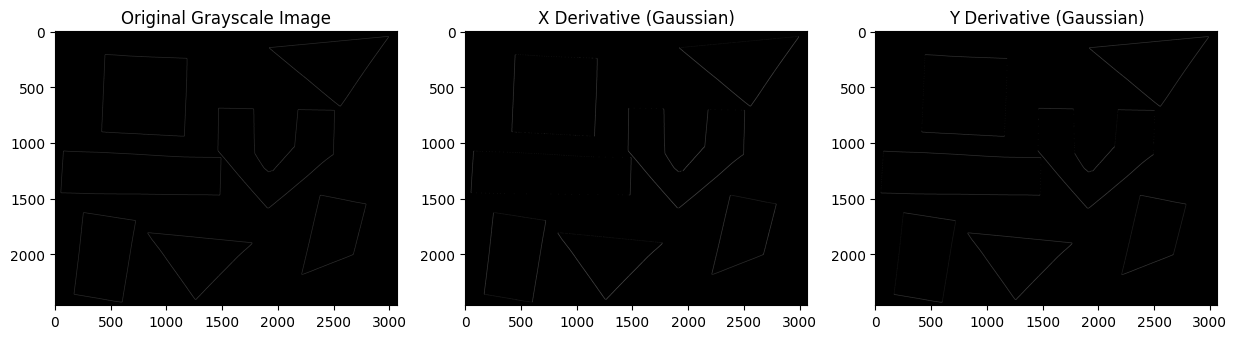

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a 1D Gaussian kernel
def gaussian_1d(size, sigma):
     x = np.linspace(-size // 2 + 1, size // 2, size)
     k = np.exp(-(x**2) / (2 * sigma**2))
     kernel = k / np.sum(k)
     return kernel

# Function to generate a 1D Gaussian derivative kernel
def gaussian_derivative_1d(size, sigma):
    x = np.linspace(-size // 2 + 1, size // 2, size)
    k = -x * np.exp(-(x**2) / (2 * sigma**2))
    kernel = k / np.sum(np.abs(k))
    return kernel

# Define parameters for Gaussian filters
kernel_size = 5
sigma = 1.0

# Compute 1D filters
gaussian_x = gaussian_1d(kernel_size, sigma).reshape(1, -1)
gaussian_y = gaussian_1d(kernel_size, sigma).reshape(-1, 1)
gaussian_derivative_x = gaussian_derivative_1d(kernel_size, sigma).reshape(1, -1)
gaussian_derivative_y = gaussian_derivative_1d(kernel_size, sigma).reshape(-1, 1)

# Load the image and convert it to grayscale
image = cv2. imread ('/content/shapes-01-canny-edges.png', cv2. IMREAD_GRAYSCALE)

# Detect X derivative (Separable convolution)
image_x_derivative = cv2.filter2D(image, -1, gaussian_derivative_x)  # Convolving image with the Gaussian derivative in the x direction - (X derivative)
image_x_derivative = cv2.filter2D(image_x_derivative, -1, gaussian_y)  # Smoothing along y direction

# Detect Y derivative (Separable convolution)
image_y_derivative = cv2.filter2D(image, -1, gaussian_derivative_y)  # Convolving image with the Gaussian derivative in the y direction - (Y derivative)
image_y_derivative = cv2.filter2D(image_y_derivative, -1, gaussian_x)  #  Smoothing along x direction

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot (1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.subplot (1, 3, 2)
plt.imshow (image_x_derivative, cmap='gray')
plt.title("X Derivative (Gaussian)")
plt.subplot(1, 3, 3)
plt.imshow(image_y_derivative, cmap='gray')
plt.title("Y Derivative (Gaussian)")
plt.show()

Observation:


*   The output shows the X and Y derivatives highlighting edges in different directions. The X derivative shows vertical edges, and the Y derivative shows horizontal edges.

*   This method captures smooth and well-defined edges without adding noise, making it great for finding transitions in images.

# Question 8. Laplacian of Gaussian (LoG) Filtering

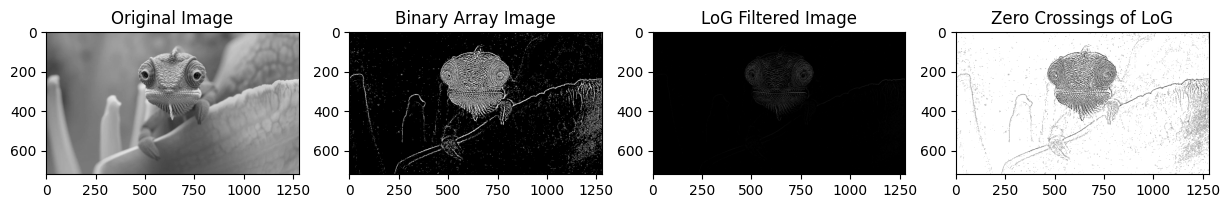

In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Function to create a Laplacian of Gaussian filter
def laplacian_of_gaussian(size, sigma):
    x = np.linspace(-size // 2 + 1, size // 2, size)
    y = np.linspace(-size // 2 + 1, size // 2, size)
    x, y = np.meshgrid(x,y)
    norm = (x**2 + y**2) / (2.0 * sigma**2)
    g = np.exp(-norm) / (2.0 * np.pi * sigma**2)
    k = ((norm - 1.0) / (sigma**4)) * g
    kernel = k - np.mean(k)
    return kernel

# Apply the LoG filter to the image
def apply_log(image, size, sigma):
  log_filter = laplacian_of_gaussian (size, sigma)
  log_filtered_image = cv2. filter2D(image, -1, log_filter)
  return log_filtered_image

# Detect zero crossings
def detect_zero_crossings (log_image):
  # Define the 1D filters for horizontal and vertical derivatives
  horizontal_filter = np.array([[-1, 1]]) # Horizontal 1x2 filter
  vertical_filter = np.array([[-1], [1]]) # Vertical 2x1 filter

  # Convolve the image with the horizontal and vertical filters
  horizontal_edges = cv2. filter2D(log_image, -1, horizontal_filter)
  vertical_edges = cv2. filter2D(log_image, -1, vertical_filter)

  # Detect zero crossings by checking for sign changes between adjacent pixels
  zero_crossings = np.zeros_like(log_image)
  zero_crossings[(horizontal_edges > 0) & (horizontal_edges < 0)] = 1
  zero_crossings[(vertical_edges > 0) & (vertical_edges < 0)] = 1
  zero_crossings[(horizontal_edges == 0) & (vertical_edges == 0)] = 1
  return zero_crossings

# Load the image
image = cv2. imread('/content/MainAfter.webp', cv2. IMREAD_GRAYSCALE)

# Apply Laplacian of Gaussian (LoG)
size = 5 # Filter size
sigma = 1.0 # Standard deviation
log_filtered_image = apply_log(image, size, sigma)
zero_crossings = detect_zero_crossings(log_filtered_image)

# Display the original image, Binary image, LoG-filtered image, and zero crossings
plt.figure(figsize=(15, 5))
plt.subplot(1,4,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.subplot(1,4,2)
binary_image = np.where(log_filtered_image <= 0, 0, 1)   #binary array
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Array Image')
plt.subplot(1, 4, 3)
plt.imshow(log_filtered_image, cmap='gray')
plt.title("LoG Filtered Image")
plt.subplot(1, 4, 4)
plt.imshow(zero_crossings, cmap='gray')
plt.title("Zero Crossings of LoG")
plt.show()

 Observation:

*  The result shows the original image ,the image after the LoG filter is applied, and the edges detected by finding zero crossings in the filtered image.

*  The LoG filter helps us find edges in images.  It first smooths things out to reduce noise and then points out the spots of rapid intensity change, like the outlines of objects.


